Isolation Forest is a technique for identifying outliers in data that was first introduced by Fei Tony Liu and Zhi-Hua Zhou in 2008. The approach employs binary trees to detect anomalies, resulting in a linear time complexity and low memory usage that is well-suited for processing large datasets.

Since its introduction, Isolation Forest has gained popularity as a fast and reliable algorithm for anomaly detection in various fields such as cybersecurity, finance, and medical research.

### Isolation Forest in Anomaly Detection

Isolation Forests(IF), similar to Random Forests, are build based on decision trees. However, the key difference is that IFs are built by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. This process is repeated until the data is isolated into individual trees. The number of splits required to isolate a data point is used as a measure of its normality. The more splits required, the more likely the data point is an outlier.

### How Isolation Forest Works

 Isolation forest outlier detection is nothing but an ensemble of binary decision trees. And each tree in an isolation forest is called an isolation tree (iTree). The algorithm starts with the training of the data by generating isolation trees.

The algorithm involves selecting a random sub-sample of a dataset and assigning it to a binary tree. The tree is then branched on a random threshold, with each node being split into left and right branches based on the selected threshold. This process continues recursively until each data point is completely isolated or the max depth is reached. The process is repeated to construct random binary trees.

After an ensemble of iTrees(Isolation Forest) is created, model training is complete. During scoring, a data point is traversed through all the trees which were trained earlier. Now, an ‘anomaly score’ is assigned to each of the data points based on the depth of the tree required to arrive at that point. This score is an aggregation of the depth obtained from each of the iTrees. An anomaly score of -1 is assigned to anomalies and 1 to normal points based on the contamination(percentage of anomalies present in the data) parameter provided.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a dataset
data = pd.DataFrame({'student_id': range(1, 11), 'marks': [95, 98, 92, 10000, 91, 89, 90, 200, 100, 100] })


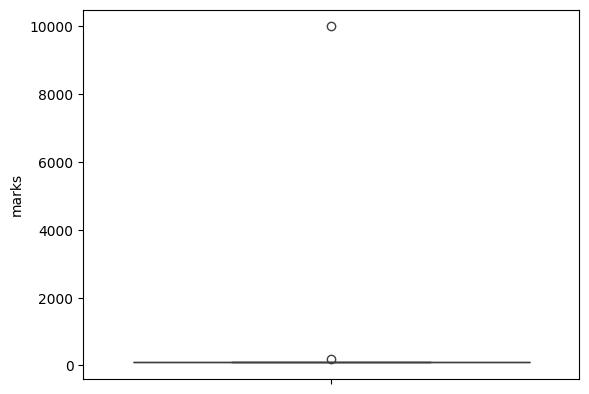

In [21]:
sns.boxplot(data.marks)
plt.show()

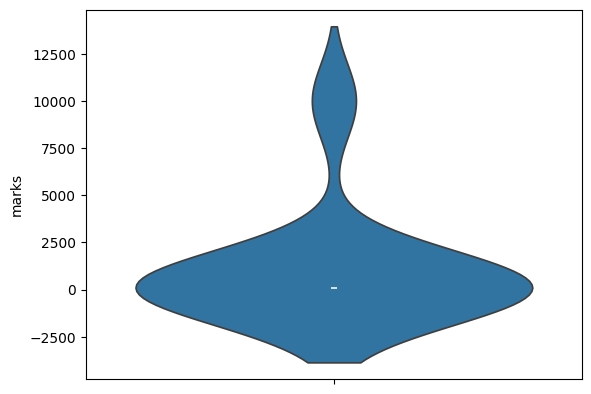

In [22]:
sns.violinplot(data.marks)
plt.show()

In [23]:
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data.marks.values.reshape(-1, 1))
data['marks_scaled'] = np_scaled

In [24]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=0)
y_train = X_train['marks']
y_test = X_test['marks']

In [25]:
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42, max_samples='auto')

In [26]:
model.fit(X_train['marks_scaled'].values.reshape(-1, 1))

IsolationForest(contamination=0.01, random_state=42)

In [27]:
data['anomaly'] = model.predict(data['marks_scaled'].values.reshape(-1, 1))
data['anomaly'] = data['anomaly'].map( {1: 0, -1: 1} )
print(data)

   student_id  marks  marks_scaled  anomaly
0           1     95     -0.337058        0
1           2     98     -0.336047        0
2           3     92     -0.338068        0
3           4  10000      2.999829        1
4           5     91     -0.338405        0
5           6     89     -0.339079        0
6           7     90     -0.338742        0
7           8    200     -0.301684        0
8           9    100     -0.335373        0
9          10    100     -0.335373        0


In [28]:
accuracy = 100 * (data['anomaly'] == 0).sum() / data['anomaly'].count()
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 90.00%


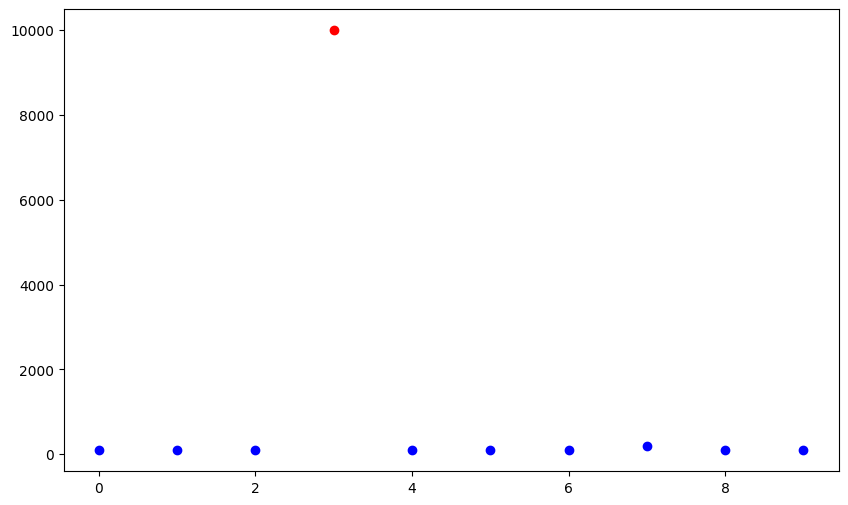

In [29]:
anomaly = data.loc[data['anomaly'] == 1]
normal = data.loc[data['anomaly'] == 0]
plt.figure(figsize=(10, 6))
plt.plot(normal.index, normal['marks'], 'bo')
plt.plot(anomaly.index, anomaly['marks'], 'ro')
plt.show()